# Genetic Algorithm Sudoku Solver
⭐ Idea

Instead of using backtracking or constraint logic, we treat each Sudoku grid as an organism, and evolve a population until one becomes a valid solution.

Main components:

Representation: A 9×9 grid where each 3×3 block contains digits 1–9 (keeps structure valid).

Fitness function: Counts duplicates in rows/columns (lower is better).

Mutation: Swap two numbers inside a 3×3 block.

Crossover: Choose blocks from each parent.

Selection: Take fittest individuals for breeding.


## Full Python Code (Compact & Understandable)

In [2]:
import random
import copy

# ---- CONFIG ----
POP_SIZE = 200
GENERATIONS = 2000
MUTATION_RATE = 0.1

# Example Sudoku puzzle (0 = empty)
PUZZLE = [
    [5,3,0, 0,7,0, 0,0,0],
    [6,0,0, 1,9,5, 0,0,0],
    [0,9,8, 0,0,0, 0,6,0],

    [8,0,0, 0,6,0, 0,0,3],
    [4,0,0, 8,0,3, 0,0,1],
    [7,0,0, 0,2,0, 0,0,6],

    [0,6,0, 0,0,0, 2,8,0],
    [0,0,0, 4,1,9, 0,0,5],
    [0,0,0, 0,8,0, 0,7,9],
]


# ---- GENETIC ALGORITHM IMPLEMENTATION ----

def create_candidate(puzzle):
    """Fill each 3x3 block randomly respecting fixed clues."""
    candidate = copy.deepcopy(puzzle)
    for br in range(3):
        for bc in range(3):
            existing = {candidate[r][c]
                        for r in range(br*3, br*3+3)
                        for c in range(bc*3, bc*3+3)
                        if candidate[r][c] != 0}

            missing = list(set(range(1,10)) - existing)
            random.shuffle(missing)

            for r in range(br*3, br*3+3):
                for c in range(bc*3, bc*3+3):
                    if candidate[r][c] == 0:
                        candidate[r][c] = missing.pop()
    return candidate


def fitness(grid):
    """Count duplicates in rows & columns."""
    score = 0
    for i in range(9):
        score += (9 - len(set(grid[i])))                  # row duplicates
        score += (9 - len(set(row[i] for row in grid)))   # column duplicates
    return score


def mutate(grid, puzzle):
    """Swap two random cells inside a block, but only if not fixed clues."""
    if random.random() > MUTATION_RATE:
        return grid

    r = random.randint(0,8)
    c = random.randint(0,8)
    block_r = (r // 3) * 3
    block_c = (c // 3) * 3

    # Find mutable cells in the same block
    mutable = [(i,j) for i in range(block_r, block_r+3)
                      for j in range(block_c, block_c+3)
                      if puzzle[i][j] == 0]

    if len(mutable) >= 2:
        a, b = random.sample(mutable, 2)
        grid[a[0]][a[1]], grid[b[0]][b[1]] = grid[b[0]][b[1]], grid[a[0]][a[1]]

    return grid


def crossover(parent1, parent2):
    """Combine parents block-by-block into a correct 9×9 child."""
    child = [[0]*9 for _ in range(9)]
    
    for br in range(3):
        for bc in range(3):
            # choose block
            src = parent1 if random.random() < 0.5 else parent2
            
            for r in range(3):
                for c in range(3):
                    child[br*3 + r][bc*3 + c] = src[br*3 + r][bc*3 + c]
    return child


# ---- MAIN EVOLUTION LOOP ----

population = [create_candidate(PUZZLE) for _ in range(POP_SIZE)]

for gen in range(GENERATIONS):
    population.sort(key=fitness)
    best = population[0]

    if fitness(best) == 0:
        print(f"Solved in generation {gen}!")
        break

    next_pop = population[:20]  # keep best 20

    # Breed new candidates
    while len(next_pop) < POP_SIZE:
        p1, p2 = random.sample(population[:50], 2)
        child = crossover(p1, p2)
        child = mutate(child, PUZZLE)
        next_pop.append(child)

    population = next_pop

# ---- OUTPUT ----
for row in best:
    print(row)


[5, 3, 4, 6, 7, 8, 1, 9, 2]
[6, 2, 7, 1, 9, 5, 4, 3, 8]
[1, 9, 8, 3, 4, 2, 5, 6, 7]
[8, 5, 2, 9, 6, 1, 7, 4, 3]
[4, 1, 6, 8, 5, 3, 9, 2, 1]
[7, 3, 9, 7, 2, 4, 8, 5, 6]
[9, 6, 1, 5, 3, 7, 2, 8, 4]
[3, 8, 7, 4, 1, 9, 6, 1, 5]
[2, 4, 5, 2, 8, 6, 3, 7, 9]


In [2]:
! pip install -q --upgrade pip
! pip install matplotlib numpy

In [4]:
! pip install matplotlib


Best solution found:

[5, 3, 2, 6, 7, 8, 9, 1, 4]
[6, 4, 7, 1, 9, 5, 3, 2, 8]
[1, 9, 8, 2, 3, 4, 5, 6, 7]
[8, 2, 9, 5, 6, 1, 7, 4, 3]
[4, 5, 6, 8, 4, 3, 2, 9, 1]
[7, 3, 1, 9, 2, 7, 8, 5, 6]
[9, 6, 4, 7, 5, 2, 2, 8, 1]
[7, 8, 3, 4, 1, 9, 6, 3, 5]
[2, 1, 5, 3, 8, 6, 4, 7, 9]


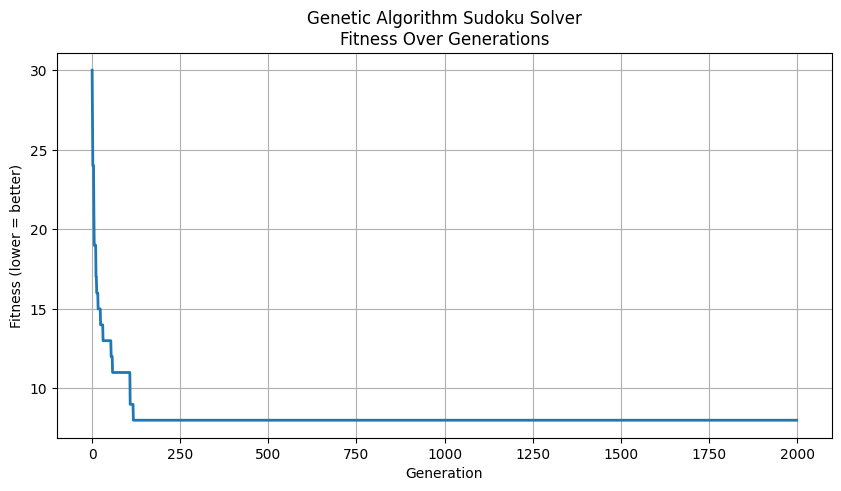

In [4]:
import random
import copy
import matplotlib.pyplot as plt

# -----------------------------
# CONFIGURATION
# -----------------------------

POP_SIZE = 200       # population size
GENERATIONS = 2000   # max number of generations
MUTATION_RATE = 0.1  # probability of mutation

# Sudoku puzzle (0 = empty)
PUZZLE = [
    [5,3,0, 0,7,0, 0,0,0],
    [6,0,0, 1,9,5, 0,0,0],
    [0,9,8, 0,0,0, 0,6,0],

    [8,0,0, 0,6,0, 0,0,3],
    [4,0,0, 8,0,3, 0,0,1],
    [7,0,0, 0,2,0, 0,0,6],

    [0,6,0, 0,0,0, 2,8,0],
    [0,0,0, 4,1,9, 0,0,5],
    [0,0,0, 0,8,0, 0,7,9],
]


# -----------------------------
# GENETIC FUNCTIONS
# -----------------------------

def create_candidate(puzzle):
    """Generate a valid initial candidate by filling each 3×3 block."""
    candidate = copy.deepcopy(puzzle)
    
    for br in range(3):
        for bc in range(3):
            existing = {candidate[r][c]
                        for r in range(br*3, br*3+3)
                        for c in range(bc*3, bc*3+3)
                        if candidate[r][c] != 0}
            
            missing = list(set(range(1, 10)) - existing)
            random.shuffle(missing)

            for r in range(br*3, br*3+3):
                for c in range(bc*3, bc*3+3):
                    if candidate[r][c] == 0:
                        candidate[r][c] = missing.pop()
    return candidate


def fitness(grid):
    """Count duplicates in rows + columns (smaller is better)."""
    score = 0
    for i in range(9):
        score += (9 - len(set(grid[i])))                 # row duplicates
        score += (9 - len(set(row[i] for row in grid)))  # column duplicates
    return score


def crossover(parent1, parent2):
    """Safe block-wise crossover producing exact 9×9 children."""
    child = [[0]*9 for _ in range(9)]
    
    for br in range(3):
        for bc in range(3):
            src = parent1 if random.random() < 0.5 else parent2
            for r in range(3):
                for c in range(3):
                    child[br*3 + r][bc*3 + c] = src[br*3 + r][bc*3 + c]
    return child


def mutate(grid, puzzle):
    """Swap two mutable cells inside a random block."""
    if random.random() > MUTATION_RATE:
        return grid

    br = random.randint(0, 2)
    bc = random.randint(0, 2)

    mutable = [(r, c)
               for r in range(br*3, br*3+3)
               for c in range(bc*3, bc*3+3)
               if puzzle[r][c] == 0]

    if len(mutable) >= 2:
        (r1, c1), (r2, c2) = random.sample(mutable, 2)
        grid[r1][c1], grid[r2][c2] = grid[r2][c2], grid[r1][c1]

    return grid


# -----------------------------
# MAIN EVOLUTION LOOP
# -----------------------------

population = [create_candidate(PUZZLE) for _ in range(POP_SIZE)]
fitness_history = []

for gen in range(GENERATIONS):
    population.sort(key=fitness)
    best = population[0]
    best_fit = fitness(best)
    fitness_history.append(best_fit)

    # print(f"Generation {gen}  |  Best fitness = {best_fit}")

    if best_fit == 0:
        print("🎉 Sudoku solved!")
        break

    next_population = population[:20]  # keep the elites

    # breed new individuals
    while len(next_population) < POP_SIZE:
        p1, p2 = random.sample(population[:50], 2)
        child = crossover(p1, p2)
        child = mutate(child, PUZZLE)
        next_population.append(child)

    population = next_population


# -----------------------------
# OUTPUT + VISUALIZATION
# -----------------------------

print("\nBest solution found:\n")
for row in best:
    print(row)

# Plot fitness over time
plt.figure(figsize=(10, 5))
plt.plot(fitness_history, linewidth=2)
plt.title("Genetic Algorithm Sudoku Solver\nFitness Over Generations")
plt.xlabel("Generation")
plt.ylabel("Fitness (lower = better)")
plt.grid(True)
plt.show()


In [3]:
# ! py -3.10 -m pip uninstall matplotlib matplotlib-inline -y


In [2]:
# ! py -3.10 -m pip install matplotlib
# ! py -3.10 -m pip install matplotlib-inline


In [5]:
import random
import copy
import tkinter as tk
from tkinter import ttk

# -----------------------------
# CONFIGURATION
# -----------------------------
POP_SIZE = 200
GENERATIONS = 2000
MUTATION_RATE = 0.1
UPDATE_INTERVAL = 10  # update GUI every N generations

PUZZLE = [
    [5,3,0, 0,7,0, 0,0,0],
    [6,0,0, 1,9,5, 0,0,0],
    [0,9,8, 0,0,0, 0,6,0],

    [8,0,0, 0,6,0, 0,0,3],
    [4,0,0, 8,0,3, 0,0,1],
    [7,0,0, 0,2,0, 0,0,6],

    [0,6,0, 0,0,0, 2,8,0],
    [0,0,0, 4,1,9, 0,0,5],
    [0,0,0, 0,8,0, 0,7,9],
]

# -----------------------------
# GA FUNCTIONS
# -----------------------------

def create_candidate(puzzle):
    candidate = copy.deepcopy(puzzle)
    for br in range(3):
        for bc in range(3):
            existing = {candidate[r][c] 
                        for r in range(br*3, br*3+3) 
                        for c in range(bc*3, bc*3+3) if candidate[r][c] != 0}
            missing = list(set(range(1,10)) - existing)
            random.shuffle(missing)
            for r in range(br*3, br*3+3):
                for c in range(bc*3, bc*3+3):
                    if candidate[r][c] == 0:
                        candidate[r][c] = missing.pop()
    return candidate

def fitness(grid):
    score = 0
    for i in range(9):
        score += (9 - len(set(grid[i])))
        score += (9 - len(set(row[i] for row in grid)))
    return score

def crossover(parent1, parent2):
    child = [[0]*9 for _ in range(9)]
    for br in range(3):
        for bc in range(3):
            src = parent1 if random.random() < 0.5 else parent2
            for r in range(3):
                for c in range(3):
                    child[br*3+r][bc*3+c] = src[br*3+r][bc*3+c]
    return child

def mutate(grid, puzzle):
    if random.random() > MUTATION_RATE:
        return grid
    br, bc = random.randint(0,2), random.randint(0,2)
    mutable = [(r,c) for r in range(br*3, br*3+3) for c in range(bc*3, bc*3+3) if puzzle[r][c]==0]
    if len(mutable) >= 2:
        (r1,c1),(r2,c2) = random.sample(mutable,2)
        grid[r1][c1], grid[r2][c2] = grid[r2][c2], grid[r1][c1]
    return grid

# -----------------------------
# TKINTER GUI
# -----------------------------
class SudokuGUI:
    def __init__(self, master):
        self.master = master
        master.title("GA Sudoku Solver")

        self.cells = [[tk.Label(master, text="", width=3, height=2, font=("Arial",16), relief="ridge", borderwidth=1)
                       for c in range(9)] for r in range(9)]
        for r in range(9):
            for c in range(9):
                self.cells[r][c].grid(row=r, column=c)

        self.status = tk.Label(master, text="Generation: 0 | Fitness: N/A", font=("Arial",14))
        self.status.grid(row=9, column=0, columnspan=9)

        self.population = [create_candidate(PUZZLE) for _ in range(POP_SIZE)]
        self.generation = 0
        self.best = None

        self.master.after(100, self.evolve)

    def update_gui(self, grid, gen, fit):
        for r in range(9):
            for c in range(9):
                self.cells[r][c]['text'] = str(grid[r][c])
                if PUZZLE[r][c] != 0:
                    self.cells[r][c]['fg'] = "blue"
                else:
                    self.cells[r][c]['fg'] = "black"
        self.status['text'] = f"Generation: {gen} | Fitness: {fit}"
        self.master.update_idletasks()

    def evolve(self):
        if self.generation >= GENERATIONS:
            return

        self.population.sort(key=fitness)
        self.best = self.population[0]
        best_fit = fitness(self.best)

        if self.generation % UPDATE_INTERVAL == 0:
            self.update_gui(self.best, self.generation, best_fit)

        if best_fit == 0:
            self.update_gui(self.best, self.generation, best_fit)
            self.status['text'] += " 🎉 Solved!"
            return

        next_pop = self.population[:20]
        while len(next_pop) < POP_SIZE:
            p1, p2 = random.sample(self.population[:50],2)
            child = crossover(p1,p2)
            child = mutate(child, PUZZLE)
            next_pop.append(child)
        self.population = next_pop
        self.generation += 1
        self.master.after(1, self.evolve)

# -----------------------------
# RUN GUI
# -----------------------------
root = tk.Tk()
app = SudokuGUI(root)
root.mainloop()
